# Migration and Fst

* My Drive/GitHub/transmission_ms/migration_Fst.ipynb
* Checked in working order 14 Nov 2022
* From 211012_migration_Fst.ipynb

In [1]:
import coalestr as cs
import matplotlib.pyplot as plt

In [2]:
metapop_history = [[100000, 3000, 10, 1, 0]]
metapop = cs.Population(metapop_history)
metapop.get_coalescent()
metapop.get_diversity()

Observation time.    Events captured.   Mean coalescence time
                      beho      wiho        beho     wiho
        0              99.7      99.7     16867.3  15476.3
Observation time.    SNP heterozygosity.   Haplotype homozygosity at 27.0 kb locus
                      beho       wiho           beho       wiho
        0           3.71e-04   3.40e-04       4.41e-03   8.47e-02


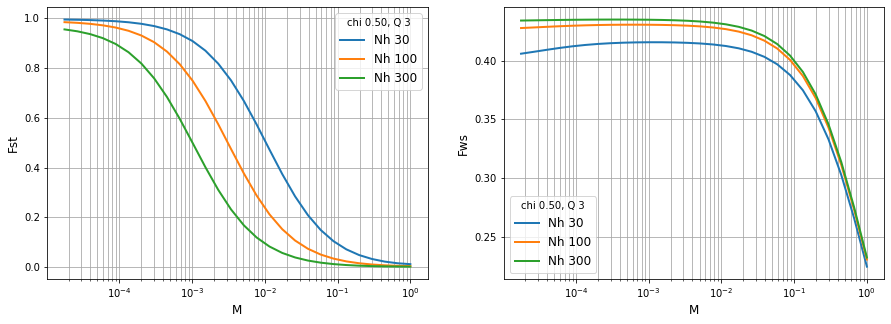

In [3]:
N_list = [30, 100, 300]
Q = 3
chi = 0.5
duration = 10000

iterations = 28

fig, [a1, a2] = plt.subplots(1, 2, figsize=(15,5))

for i in range(len(N_list)):
    
    Nh = N_list[i]
    M_list = []
    Fst = []
    Fws = []
    
    for j in range(iterations):
    
        M = 1.5 ** (-j)
        Nm = Nh * M
        subpop_history = [[duration, Nh, Q, chi, Nm]]
    
        subpop = cs.Population(subpop_history, metapopulation = metapop)
        subpop.get_coalescent(show = False)
        subpop.get_diversity(show = False)
    
        M_list.append(M)
        Fst.append(subpop.diversity[0, 6])
        Fws.append(subpop.diversity[0, 5])
        
    a1.plot(M_list, Fst, linewidth = 2, label = 'Nh {0:.0f}'.format(Nh))
    a2.plot(M_list, Fws, linewidth = 2, label = 'Nh {0:.0f}'.format(Nh)) 
        
a1.legend(title = 'chi {0:.2f}, Q {1:.0f}'.format(chi, Q), frameon=True, fontsize=12)
a1.set_xlabel("M", fontsize=12)
a1.set_ylabel("Fst", fontsize=12)
a1.set_xscale('log',basex=10)
a1.grid(b=True, which='both', color='0.65', linestyle='-')

a2.legend(title = 'chi {0:.2f}, Q {1:.0f}'.format(chi, Q), frameon=True, fontsize=12)
a2.set_xlabel("M", fontsize=12)
a2.set_ylabel("Fws", fontsize=12)
a2.set_xscale('log',basex=10)
a2.grid(b=True, which='both', color='0.65', linestyle='-')

plt.show()

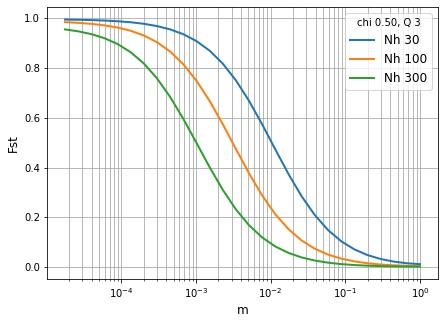

In [6]:
N_list = [30, 100, 300]
Q = 3
chi = 0.5
duration = 10000

iterations = 28

fig, a1 = plt.subplots(1, 1, figsize=(7,5))

for i in range(len(N_list)):
    
    Nh = N_list[i]
    m_list = []
    Fst = []
    
    for j in range(iterations):
    
        m = 1.5 ** (-j)
        Nm = Nh * m
        subpop_history = [[duration, Nh, Q, chi, Nm]]
    
        subpop = cs.Population(subpop_history, metapopulation = metapop)
        subpop.get_coalescent(show = False)
        subpop.get_diversity(show = False)
    
        m_list.append(m)
        Fst.append(subpop.diversity[0, 6])
        
    a1.plot(m_list, Fst, linewidth = 2, label = 'Nh {0:.0f}'.format(Nh))
        
a1.legend(title = 'chi {0:.2f}, Q {1:.0f}'.format(chi, Q), frameon=True, fontsize=12)
a1.set_xlabel("m", fontsize=12)
a1.set_ylabel("Fst", fontsize=12)
a1.set_xscale('log',basex=10)
a1.grid(b=True, which='both', color='0.65', linestyle='-')

plt.show()

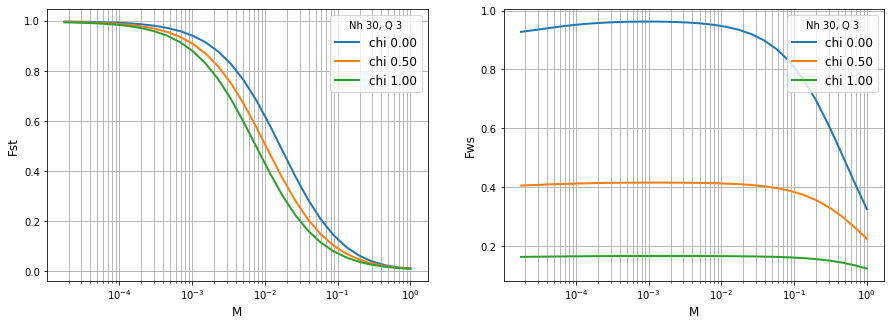

In [10]:
Nh = 30
Q = 3
chi_list = [0, 0.5, 1]
duration = 300

iterations = 28

fig, (a1, a2) = plt.subplots(1, 2, figsize=(15,5))

for i in range(len(chi_list)):
    
    chi = chi_list[i]
    M_list = []
    Fst = []
    Fws = []
    
    for j in range(iterations):
    
        M = 1.5 ** (-j)
        Nm = Nh * M
        subpop_history = [[duration, Nh, Q, chi, Nm]]
    
        subpop = cs.Population(subpop_history, metapopulation = metapop)
        subpop.get_coalescent(show = False)
        subpop.get_diversity(show = False)
    
        M_list.append(M)
        Fst.append(subpop.diversity[0, 6])
        Fws.append(subpop.diversity[0, 5])
        
    a1.plot(M_list, Fst, linewidth = 2, label = 'chi {0:.2f}'.format(chi))
    a2.plot(M_list, Fws, linewidth = 2, label = 'chi {0:.2f}'.format(chi)) 
        
a1.legend(title = 'Nh {0:.0f}, Q {1:.0f}'.format(Nh, Q), frameon=True, fontsize=12)
a1.set_xlabel("M", fontsize=12)
a1.set_ylabel("Fst", fontsize=12)
a1.set_xscale('log',basex=10)
a1.grid(b=True, which='both', color='0.65', linestyle='-')

a2.legend(title = 'Nh {0:.0f}, Q {1:.0f}'.format(Nh, Q), frameon=True, fontsize=12)
a2.set_xlabel("M", fontsize=12)
a2.set_ylabel("Fws", fontsize=12)
a2.set_xscale('log',basex=10)
a2.grid(b=True, which='both', color='0.65', linestyle='-')

plt.show()